In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [4]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)


In [19]:
X_train, y_train = train["features"], train["labels"]
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [20]:
X_train.shape

(34799, 32, 32, 3)

In [21]:
y_train.shape

(34799,)

In [22]:
X_test.shape

(12630, 32, 32, 3)

In [23]:
y_test.shape

(12630,)

23

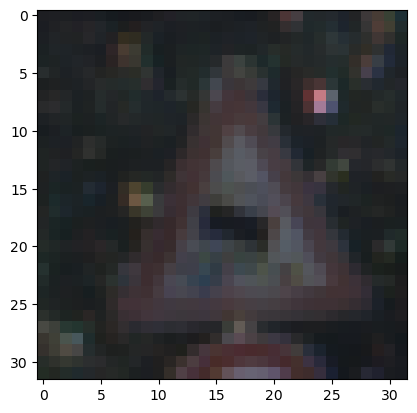

In [24]:
i = 1999
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [25]:
from sklearn. utils import shuffle

In [26]:
X_train, y_train = shuffle(X_train, y_train)

In [27]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [28]:
X_train_gray_norm = (X_train_gray - 128)/ 128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [29]:
X_train_gray.shape

(34799, 32, 32, 1)

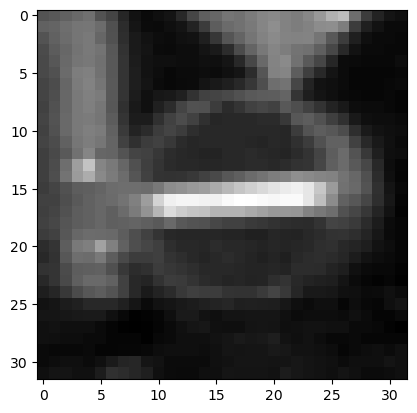

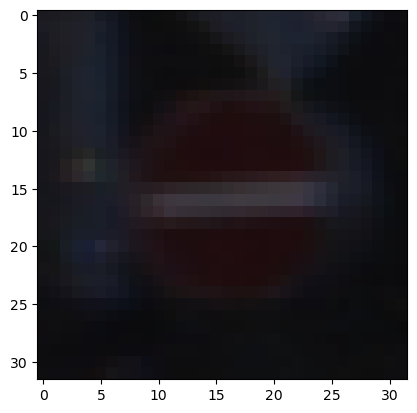

In [30]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [31]:
# Import train_test_split from scikit library
# Import Keras
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# from subprocess import check_output
from sklearn.model_selection import train_test_split


In [32]:
image_shape = X_train_gray[i].shape

In [33]:
image_shape

(32, 32, 1)

In [38]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(43, activation = 'sigmoid'))

In [40]:
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])

In [44]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size=500,
             epochs=50,
             verbose=1,
             validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 2s 23ms/step - loss: 0.3600 - accuracy: 0.9047 - val_loss: 1.0201 - val_accuracy: 0.7571
Epoch 2/50
70/70 [==============================] - 2s 23ms/step - loss: 0.3573 - accuracy: 0.9053 - val_loss: 1.0199 - val_accuracy: 0.7630
Epoch 3/50
70/70 [==============================] - 1s 19ms/step - loss: 0.3542 - accuracy: 0.9056 - val_loss: 1.0292 - val_accuracy: 0.7492
Epoch 4/50
70/70 [==============================] - 1s 20ms/step - loss: 0.3465 - accuracy: 0.9080 - val_loss: 1.0003 - val_accuracy: 0.7660
Epoch 5/50
70/70 [==============================] - 1s 20ms/step - loss: 0.3440 - accuracy: 0.9072 - val_loss: 1.0089 - val_accuracy: 0.7653
Epoch 6/50
70/70 [==============================] - 1s 19ms/step - loss: 0.3402 - accuracy: 0.9109 - val_loss: 1.0259 - val_accuracy: 0.7510
Epoch 7/50
70/70 [==============================] - 1s 21ms/step - loss: 0.3362 - accuracy: 0.9107 - val_loss: 1.0366 - val_accuracy: 0.7635
Epoch 8/50
70

In [43]:
score = cnn_model.evaluate(X_test_gray_norm, y_test, verbose=0)
print(score[1])

0.7408550977706909


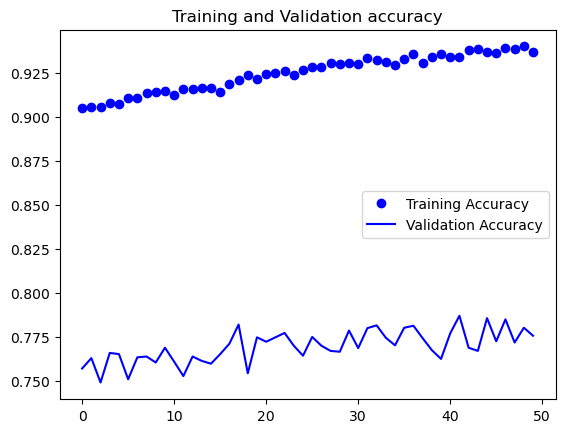

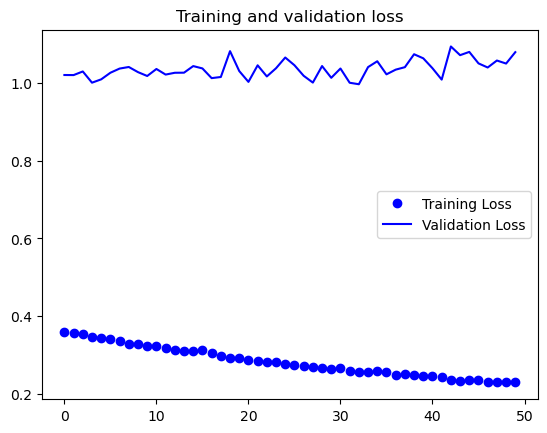

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
# New way:
predict_x = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

#get the indices to be plotted
y_true = y_test

395/395 [==============================] - 1s 2ms/step


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
cm

array([[ 22,   8,  16, ...,   0,   0,   0],
       [172, 396,  93, ...,   3,   0,   0],
       [123,  89, 460, ...,   1,   0,   0],
       ...,
       [ 16,   1,   8, ...,  21,   0,   6],
       [  0,   0,   2, ...,   1,   7,   0],
       [  0,   0,   1, ...,   1,   5,  35]], dtype=int64)

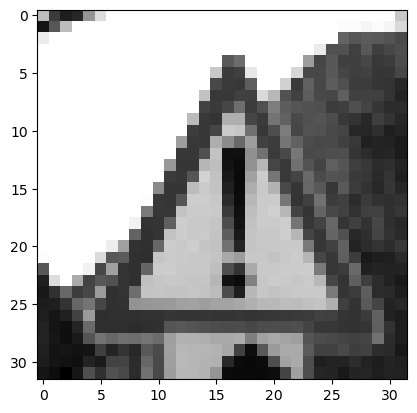

In [52]:
plt.imshow(X_test_gray_norm[6].squeeze(), cmap="gray")

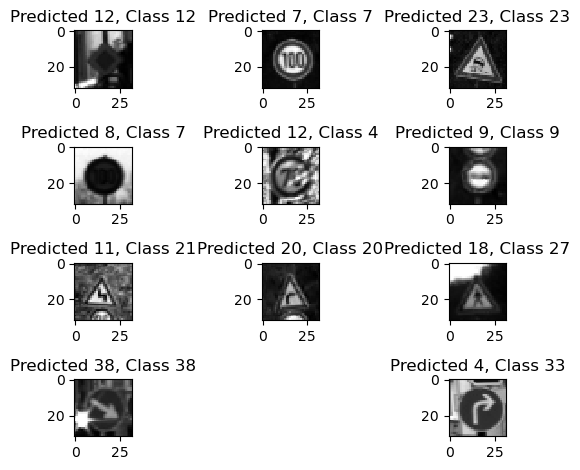

In [61]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()